In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv("/kaggle/input/dataset-iitkgp/MG_data.xlsx - Sheet1.csv")

In [2]:
df.head(10)

,Alloy,Tg,Tx,Tl,TEN,VA,d,Sm,Dmax
0,Ti50Cu42.5Ni7.5,670.0,708.0,1226.0,1.76,13.27,0.10,7.90,0.2
1,Zr70Al8Cu19Ni3,630.0,689.0,1200.0,1.48,18.38,0.13,7.92,0.2
2,Zr70Al8Cu3Ni19,640.0,710.0,1220.0,1.48,18.11,0.15,8.05,0.2
3,Ag46.2Mg15.4Ca38.4,407.0,439.0,809.0,1.48,16.48,0.10,8.79,0.3
4,Ag53.8Mg7.7Ca30.8Cu7.7,428.0,488.0,843.0,1.59,15.55,0.10,9.45,0.3
5,Cu60Zr20Hf10Ti10,754.0,797.0,1197.0,1.59,14.23,0.13,9.71,0.3
6,Mg70Ni20La10,447.0,475.0,791.0,1.59,13.53,0.15,7.53,0.4
7,Ca55Mg15Zn30,387.0,419.0,696.0,1.59,16.60,0.16,9.02,0.5
8,Ca55Mg18Zn27,389.0,419.0,671.0,1.59,16.73,0.15,9.11,0.5
9,Ca60Mg10Zn30,380.0,400.0,666.0,1.59,17.16,0.16,8.38,0.5


In [3]:
import pandas as pd

# Sample dataframe
data = df['Alloy']

# Function to extract metals and their percentages from the alloy composition
def extract_metals(alloy):
    metals = {}
    while alloy:
        metal = ''
        while alloy and not alloy[0].isdigit():
            metal += alloy[0]
            alloy = alloy[1:]
        percentage = ''
        while alloy and (alloy[0].isdigit() or alloy[0] == '.'):
            percentage += alloy[0]
            alloy = alloy[1:]
        metals[metal] = float(percentage) if percentage else 0
    return metals

# Function to find the metal with the highest percentage
def find_dominating_metal(metals):
    return max(metals, key=metals.get)

# Function to find the second dominating metal
def find_second_dominating_metal(metals):
    sorted_metals = sorted(metals.items(), key=lambda x: x[1], reverse=True)
    if len(sorted_metals) > 1:
        return sorted_metals[1][0]
    else:
        return None

# Apply the functions to each row in the dataframe
df['Metals'] = df['Alloy'].apply(extract_metals)
df['Dominating Metal'] = df['Metals'].apply(find_dominating_metal)
df['Second Dominating Metal'] = df['Metals'].apply(find_second_dominating_metal)

# Display the resulting dataframe
df.head(10)


,Alloy,Tg,Tx,Tl,TEN,VA,d,Sm,Dmax,Metals,Dominating Metal,Second Dominating Metal
0,Ti50Cu42.5Ni7.5,670.0,708.0,1226.0,1.76,13.27,0.10,7.90,0.2,"{'Ti': 50.0, 'Cu': 42.5, 'Ni': 7.5}",Ti,Cu
1,Zr70Al8Cu19Ni3,630.0,689.0,1200.0,1.48,18.38,0.13,7.92,0.2,"{'Zr': 70.0, 'Al': 8.0, 'Cu': 19.0, 'Ni': 3.0}",Zr,Cu
2,Zr70Al8Cu3Ni19,640.0,710.0,1220.0,1.48,18.11,0.15,8.05,0.2,"{'Zr': 70.0, 'Al': 8.0, 'Cu': 3.0, 'Ni': 19.0}",Zr,Ni
3,Ag46.2Mg15.4Ca38.4,407.0,439.0,809.0,1.48,16.48,0.10,8.79,0.3,"{'Ag': 46.2, 'Mg': 15.4, 'Ca': 38.4}",Ag,Ca
4,Ag53.8Mg7.7Ca30.8Cu7.7,428.0,488.0,843.0,1.59,15.55,0.10,9.45,0.3,"{'Ag': 53.8, 'Mg': 7.7, 'Ca': 30.8, 'Cu': 7.7}",Ag,Ca
5,Cu60Zr20Hf10Ti10,754.0,797.0,1197.0,1.59,14.23,0.13,9.71,0.3,"{'Cu': 60.0, 'Zr': 20.0, 'Hf': 10.0, 'Ti': 10.0}",Cu,Zr
6,Mg70Ni20La10,447.0,475.0,791.0,1.59,13.53,0.15,7.53,0.4,"{'Mg': 70.0, 'Ni': 20.0, 'La': 10.0}",Mg,Ni
7,Ca55Mg15Zn30,387.0,419.0,696.0,1.59,16.60,0.16,9.02,0.5,"{'Ca': 55.0, 'Mg': 15.0, 'Zn': 30.0}",Ca,Zn
8,Ca55Mg18Zn27,389.0,419.0,671.0,1.59,16.73,0.15,9.11,0.5,"{'Ca': 55.0, 'Mg': 18.0, 'Zn': 27.0}",Ca,Zn
9,Ca60Mg10Zn30,380.0,400.0,666.0,1.59,17.16,0.16,8.38,0.5,"{'Ca': 60.0, 'Mg': 10.0, 'Zn': 30.0}",Ca,Zn


In [4]:
df['Trg']=df['Tg']/df['Tl']
df['Rc']=10/(df['d']*df['d'])

In [5]:
from sklearn.preprocessing import StandardScaler

# Select columns to normalize
columns_to_normalize = ['Tg', 'Tx', 'Tl', 'TEN', 'VA', 'd', 'Sm','Trg','Rc']

# Apply Z-score normalization to the selected columns
scaler = StandardScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Verify results
df.head()

# Save normalized data (optional)
# df.to_csv('normalized_data.csv', index=False)


In [6]:
df.columns

Index(['Alloy', 'Tg', 'Tx', 'Tl', 'TEN', 'VA', 'd', 'Sm', 'Dmax', 'Metals',
       'Dominating Metal', 'Second Dominating Metal', 'Trg', 'Rc'],
      dtype='object')

In [7]:
df.head()

,Alloy,Tg,Tx,Tl,TEN,VA,d,Sm,Dmax,Metals,Dominating Metal,Second Dominating Metal,Trg,Rc
0,Ti50Cu42.5Ni7.5,670.0,708.0,1226.0,1.76,13.27,0.10,7.90,0.2,"{'Ti': 50.0, 'Cu': 42.5, 'Ni': 7.5}",Ti,Cu,0.546493,1000.000000
1,Zr70Al8Cu19Ni3,630.0,689.0,1200.0,1.48,18.38,0.13,7.92,0.2,"{'Zr': 70.0, 'Al': 8.0, 'Cu': 19.0, 'Ni': 3.0}",Zr,Cu,0.525000,591.715976
2,Zr70Al8Cu3Ni19,640.0,710.0,1220.0,1.48,18.11,0.15,8.05,0.2,"{'Zr': 70.0, 'Al': 8.0, 'Cu': 3.0, 'Ni': 19.0}",Zr,Ni,0.524590,444.444444
3,Ag46.2Mg15.4Ca38.4,407.0,439.0,809.0,1.48,16.48,0.10,8.79,0.3,"{'Ag': 46.2, 'Mg': 15.4, 'Ca': 38.4}",Ag,Ca,0.503090,1000.000000
4,Ag53.8Mg7.7Ca30.8Cu7.7,428.0,488.0,843.0,1.59,15.55,0.10,9.45,0.3,"{'Ag': 53.8, 'Mg': 7.7, 'Ca': 30.8, 'Cu': 7.7}",Ag,Ca,0.507711,1000.000000


In [8]:
import pandas as pd

# Sample dataset


# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(df['Dominating Metal'], prefix='encoded')

# Concatenate the one-hot encoded columns with the original DataFrame
df_encoded = pd.concat([df, one_hot_encoded], axis=1)

df_encoded.head()


,Alloy,Tg,Tx,Tl,TEN,VA,d,Sm,Dmax,Metals,...,encoded_Ni,encoded_Pr,encoded_Sc,encoded_Sm,encoded_Tb,encoded_Ti,encoded_Tm,encoded_Y,encoded_Yb,encoded_Zr
0,Ti50Cu42.5Ni7.5,670.0,708.0,1226.0,1.76,13.27,0.10,7.90,0.2,"{'Ti': 50.0, 'Cu': 42.5, 'Ni': 7.5}",...,False,False,False,False,False,True,False,False,False,False
1,Zr70Al8Cu19Ni3,630.0,689.0,1200.0,1.48,18.38,0.13,7.92,0.2,"{'Zr': 70.0, 'Al': 8.0, 'Cu': 19.0, 'Ni': 3.0}",...,False,False,False,False,False,False,False,False,False,True
2,Zr70Al8Cu3Ni19,640.0,710.0,1220.0,1.48,18.11,0.15,8.05,0.2,"{'Zr': 70.0, 'Al': 8.0, 'Cu': 3.0, 'Ni': 19.0}",...,False,False,False,False,False,False,False,False,False,True
3,Ag46.2Mg15.4Ca38.4,407.0,439.0,809.0,1.48,16.48,0.10,8.79,0.3,"{'Ag': 46.2, 'Mg': 15.4, 'Ca': 38.4}",...,False,False,False,False,False,False,False,False,False,False
4,Ag53.8Mg7.7Ca30.8Cu7.7,428.0,488.0,843.0,1.59,15.55,0.10,9.45,0.3,"{'Ag': 53.8, 'Mg': 7.7, 'Ca': 30.8, 'Cu': 7.7}",...,False,False,False,False,False,False,False,False,False,False


In [9]:
df_encoded.replace({False: 0, True: 1}, inplace=True)

/tmp/ipykernel_34/3890823543.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded.replace({False: 0, True: 1}, inplace=True)


In [10]:
df_encoded.columns

Index(['Alloy', 'Tg', 'Tx', 'Tl', 'TEN', 'VA', 'd', 'Sm', 'Dmax', 'Metals',
       'Dominating Metal', 'Second Dominating Metal', 'Trg', 'Rc',
       'encoded_Ag', 'encoded_Ca', 'encoded_Ce', 'encoded_Cu', 'encoded_Dy',
       'encoded_Er', 'encoded_Gd', 'encoded_Hf', 'encoded_Ho', 'encoded_La',
       'encoded_Lu', 'encoded_Mg', 'encoded_Nd', 'encoded_Ni', 'encoded_Pr',
       'encoded_Sc', 'encoded_Sm', 'encoded_Tb', 'encoded_Ti', 'encoded_Tm',
       'encoded_Y', 'encoded_Yb', 'encoded_Zr'],
      dtype='object')

In [11]:
# metal_atomic_sizes = {
#     'Cu': 128,
#     'Zr': 160,
#     'Mg': 150,
#     'Ca': 180,
#     'La': 195,
#     'Ce': 185,
#     'Ti': 145,
#     'Ag': 165,
#     'Ni': 135,
#     'Pr': 190,
#     'Gd': 180,
#     'Y': 180,
#     'Hf': 155,
#     'Sm': 185,
#     'Nd': 185,
#     'Tb': 175,
#     'Dy': 175,
#     'Tm': 175,
#     'Ho': 175,
#     'Er': 175,
#     'Lu': 175,
#     'Sc': 170,
#     'Yb': 175
# }

# # Replace one-hot encoded values with atomic sizes
# df_encoded = df.copy()
# for metal, size in metal_atomic_sizes.items():
#     df_encoded['encoded_' + metal] = df_encoded['Dominating Metal'].apply(lambda x: size if x == metal else 0)

# # Drop the original 'Dominating Metal' column

# print(df_encoded)


In [12]:
df=df_encoded

In [13]:
df

,Alloy,Tg,Tx,Tl,TEN,VA,d,Sm,Dmax,Metals,...,encoded_Ni,encoded_Pr,encoded_Sc,encoded_Sm,encoded_Tb,encoded_Ti,encoded_Tm,encoded_Y,encoded_Yb,encoded_Zr
0,Ti50Cu42.5Ni7.5,670.0,708.0,1226.0,1.76,13.27,0.10,7.90,0.2,"{'Ti': 50.0, 'Cu': 42.5, 'Ni': 7.5}",...,0,0,0,0,0,1,0,0,0,0
1,Zr70Al8Cu19Ni3,630.0,689.0,1200.0,1.48,18.38,0.13,7.92,0.2,"{'Zr': 70.0, 'Al': 8.0, 'Cu': 19.0, 'Ni': 3.0}",...,0,0,0,0,0,0,0,0,0,1
2,Zr70Al8Cu3Ni19,640.0,710.0,1220.0,1.48,18.11,0.15,8.05,0.2,"{'Zr': 70.0, 'Al': 8.0, 'Cu': 3.0, 'Ni': 19.0}",...,0,0,0,0,0,0,0,0,0,1
3,Ag46.2Mg15.4Ca38.4,407.0,439.0,809.0,1.48,16.48,0.10,8.79,0.3,"{'Ag': 46.2, 'Mg': 15.4, 'Ca': 38.4}",...,0,0,0,0,0,0,0,0,0,0
4,Ag53.8Mg7.7Ca30.8Cu7.7,428.0,488.0,843.0,1.59,15.55,0.10,9.45,0.3,"{'Ag': 53.8, 'Mg': 7.7, 'Ca': 30.8, 'Cu': 7.7}",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,Mg59.5Cu22.9Ag6.6Gd11,425.0,472.0,734.0,1.47,13.50,0.13,9.47,27.0,"{'Mg': 59.5, 'Cu': 22.9, 'Ag': 6.6, 'Gd': 11.0}",...,0,0,0,0,0,0,0,0,0,0
437,Pd2Zr48Cu34Al8Ag8,699.0,794.0,1140.0,1.61,15.89,0.14,10.73,30.0,"{'Pd': 2.0, 'Zr': 48.0, 'Cu': 34.0, 'Al': 8.0,...",...,0,0,0,0,0,0,0,0,0,1
438,Ni4Zr48Cu32Al8Ag8,693.0,788.0,1129.0,1.61,15.79,0.15,11.17,30.0,"{'Ni': 4.0, 'Zr': 48.0, 'Cu': 32.0, 'Al': 8.0,...",...,0,0,0,0,0,0,0,0,0,1
439,Zr46Cu31.64Ag8.36Al8Be6,702.0,797.0,1103.0,1.60,15.26,0.17,11.85,35.0,"{'Zr': 46.0, 'Cu': 31.64, 'Ag': 8.36, 'Al': 8....",...,0,0,0,0,0,0,0,0,0,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Alloy                    441 non-null    object 
 1   Tg                       441 non-null    float64
 2   Tx                       441 non-null    float64
 3   Tl                       441 non-null    float64
 4   TEN                      441 non-null    float64
 5   VA                       441 non-null    float64
 6   d                        441 non-null    float64
 7   Sm                       441 non-null    float64
 8   Dmax                     441 non-null    float64
 9   Metals                   441 non-null    object 
 10  Dominating Metal         441 non-null    object 
 11  Second Dominating Metal  441 non-null    object 
 12  Trg                      441 non-null    float64
 13  Rc                       441 non-null    float64
 14  encoded_Ag               4

In [15]:
df['Second Dominating Metal'].value_counts()

Second Dominating Metal
Cu        169
Al         69
Zr         62
Mg         36
Ni         34
Ca         22
Zn         13
Hf          9
Be          7
Nb          6
Ce          5
Ti          2
Ag          1
(CuNi)      1
Li          1
Co          1
Fe          1
Y           1
Gd          1
Name: count, dtype: int64

In [16]:
df.columns

Index(['Alloy', 'Tg', 'Tx', 'Tl', 'TEN', 'VA', 'd', 'Sm', 'Dmax', 'Metals',
       'Dominating Metal', 'Second Dominating Metal', 'Trg', 'Rc',
       'encoded_Ag', 'encoded_Ca', 'encoded_Ce', 'encoded_Cu', 'encoded_Dy',
       'encoded_Er', 'encoded_Gd', 'encoded_Hf', 'encoded_Ho', 'encoded_La',
       'encoded_Lu', 'encoded_Mg', 'encoded_Nd', 'encoded_Ni', 'encoded_Pr',
       'encoded_Sc', 'encoded_Sm', 'encoded_Tb', 'encoded_Ti', 'encoded_Tm',
       'encoded_Y', 'encoded_Yb', 'encoded_Zr'],
      dtype='object')

In [17]:
df.drop(['Alloy','Metals','Dominating Metal','Second Dominating Metal','Second Dominating Metal'],axis=1,inplace=True)

In [18]:
y = np.log1p(df['Dmax'])

In [19]:
x=df.drop(['Dmax'],axis=1)

In [20]:
y

0      0.182322
1      0.182322
2      0.182322
3      0.262364
4      0.262364
         ...   
436    3.332205
437    3.433987
438    3.433987
439    3.583519
440    3.583519
Name: Dmax, Length: 441, dtype: float64

In [21]:
x.replace({False: 0, True: 1}, inplace=True)

In [22]:
x

,Tg,Tx,Tl,TEN,VA,d,Sm,Trg,Rc,encoded_Ag,...,encoded_Ni,encoded_Pr,encoded_Sc,encoded_Sm,encoded_Tb,encoded_Ti,encoded_Tm,encoded_Y,encoded_Yb,encoded_Zr
0,670.0,708.0,1226.0,1.76,13.27,0.10,7.90,0.546493,1000.000000,0,...,0,0,0,0,0,1,0,0,0,0
1,630.0,689.0,1200.0,1.48,18.38,0.13,7.92,0.525000,591.715976,0,...,0,0,0,0,0,0,0,0,0,1
2,640.0,710.0,1220.0,1.48,18.11,0.15,8.05,0.524590,444.444444,0,...,0,0,0,0,0,0,0,0,0,1
3,407.0,439.0,809.0,1.48,16.48,0.10,8.79,0.503090,1000.000000,1,...,0,0,0,0,0,0,0,0,0,0
4,428.0,488.0,843.0,1.59,15.55,0.10,9.45,0.507711,1000.000000,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,425.0,472.0,734.0,1.47,13.50,0.13,9.47,0.579019,591.715976,0,...,0,0,0,0,0,0,0,0,0,0
437,699.0,794.0,1140.0,1.61,15.89,0.14,10.73,0.613158,510.204082,0,...,0,0,0,0,0,0,0,0,0,1
438,693.0,788.0,1129.0,1.61,15.79,0.15,11.17,0.613818,444.444444,0,...,0,0,0,0,0,0,0,0,0,1
439,702.0,797.0,1103.0,1.60,15.26,0.17,11.85,0.636446,346.020761,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer

def rmse(y_true, y_pred):
    return np.sqrt(((y_pred - y_true) ** 2).mean())

# Create a DecisionTreeRegressor instance
tree_reg = DecisionTreeRegressor(random_state=1)

# Define KFold cross-validation
kfold = KFold(n_splits=10)

# Perform cross-validation using regression-specific scoring (e.g., neg_mean_squared_error)
cv_results = cross_validate(tree_reg, X_train, y_train, cv=kfold, scoring=make_scorer(rmse, greater_is_better=False), return_train_score=True)

# Print results
print("Train RMSE:", -cv_results['train_score'].mean())
print("Test RMSE:", -cv_results['test_score'].mean())


Train RMSE: 2.7894312491190083e-17
Test RMSE: 0.6103216540510518


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold,cross_validate,GridSearchCV
from sklearn.tree import DecisionTreeClassifier


In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, KFold

# Create DecisionTreeRegressor instance
tree_model = DecisionTreeRegressor(random_state=1)

# Define parameter grid
par_tree = {
    "max_depth": [4, 6, 10],
    "min_samples_split": [50, 100, 200],
    "min_samples_leaf": [10, 8, 15],
}

# Define KFold cross-validation
fold = KFold(n_splits=10)

# Perform grid search using GridSearchCV
grid_tree = GridSearchCV(tree_model, param_grid=par_tree, cv=fold, verbose=1)

# Fit grid search to the data
grid_tree.fit(X_train, y_train)

# Print best parameters
print("Best parameters:", grid_tree.best_params_)


Fitting 10 folds for each of 27 candidates, totalling 270 fits
Best parameters: {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 50}


In [27]:
grid_tree.fit(X_train,y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'max_depth': [4, 6, 10],
                         'min_samples_leaf': [10, 8, 15],
                         'min_samples_split': [50, 100, 200]},
             verbose=1)

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

# Get the best estimator from the grid search
best_tree_model = grid_tree.best_estimator_

# Train the best model on the entire training dataset
best_tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_tree_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R^2
r_squared = r2_score(y_test, y_pred)

# Print RMSE and R^2
print("decision tree")
print("RMSE:", rmse)
print("R^2:", r_squared)

decision tree
RMSE: 0.6311006881885046
R^2: 0.3879262533715102


In [29]:
grid_tree.best_estimator_

DecisionTreeRegressor(max_depth=6, min_samples_leaf=8, min_samples_split=50,
                      random_state=1)

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X_train, X_test, y_train, y_test are already defined

rf_model = RandomForestRegressor(random_state=1)
par_rf = {
    "n_estimators": [150, 170, 200],
    "max_depth": [50, 60, 70],
    "max_features": [5, 10, 15]
}

grid_rf = GridSearchCV(rf_model, param_grid=par_rf, cv=10, verbose=1)
grid_rf.fit(X_train, y_train)

# Get the best estimator from the grid search
best_rf_model = grid_rf.best_estimator_

# Predictions on the testing dataset
y_pred = best_rf_model.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate R^2
r_squared = r2_score(y_test, y_pred)

# Print RMSE and R^2
print("random forest")
print("RMSE:", rmse)
print("R^2:", r_squared)

# Print actual vs. predicted values
print("\nActual vs. Predicted:")
for actual, predicted in zip(y_test, y_pred):
    print("Actual:", actual, "Predicted:", predicted)


In [31]:
from sklearn.svm import SVR

# Initialize SVM regressor
svm_model = SVR()

# Define parameters for grid search
par_svm = {
    "kernel": ['linear'],
    "C": [10, 100],
    "gamma": ['auto'],
    "epsilon": [0.1, 0.2]
}

# Grid search for best parameters
grid_svm = GridSearchCV(svm_model, param_grid=par_svm, cv=10, verbose=1)
grid_svm.fit(X_train, y_train)

# Get the best estimator from the grid search
best_svm_model = grid_svm.best_estimator_

# Predictions on the testing dataset
y_pred_svm = best_svm_model.predict(X_test)

# Calculate RMSE for SVM
rmse_svm = mean_squared_error(y_test, y_pred_svm, squared=False)

# Calculate R^2 for SVM
r_squared_svm = r2_score(y_test, y_pred_svm)

# Print RMSE and R^2 for SVM
print("\nSVM Results:")
print("RMSE:", rmse_svm)
print("R^2:", r_squared_svm)

# Print actual vs. predicted values for SVM
print("\nActual vs. Predicted (SVM):")
for actual, predicted in zip(y_test, y_pred_svm):
    print("Actual:", actual, "Predicted:", predicted)


Fitting 10 folds for each of 4 candidates, totalling 40 fits

SVM Results:
RMSE: 4.2596358723117005
R^2: -26.8837638466802

Actual vs. Predicted (SVM):
Actual: 0.916290731874155 Predicted: -7.062638597701806
Actual: 3.58351893845611 Predicted: 3.9512871111285506
Actual: 1.3862943611198906 Predicted: 1.191940074647647
Actual: 1.791759469228055 Predicted: 6.625445702905637
Actual: 2.3978952727983707 Predicted: 5.3553299958360014
Actual: 2.3978952727983707 Predicted: 2.8421453403782664
Actual: 1.791759469228055 Predicted: 1.376155273849946
Actual: 1.0986122886681096 Predicted: 4.031200041855556
Actual: 2.5649493574615367 Predicted: -0.5394367986816349
Actual: 2.4423470353692043 Predicted: 1.880975751067382
Actual: 2.3978952727983707 Predicted: -0.07995710349561591
Actual: 0.916290731874155 Predicted: -7.0676751901853265
Actual: 1.0986122886681096 Predicted: 8.427692944045049
Actual: 1.0986122886681096 Predicted: 2.172132184590083
Actual: 0.6931471805599453 Predicted: -0.5217015167224588
A

In [33]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor()

# Define parameters for grid search
par_xgb = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5],
    "learning_rate": [0.1, 0.01]
}
# Grid search for best parameters
grid_xgb = GridSearchCV(xgb_model, param_grid=par_xgb, cv=10, verbose=1)
grid_xgb.fit(X_train, y_train)

# Get the best estimator from the grid search
best_xgb_model = grid_xgb.best_estimator_
# Predictions on the testing dataset
y_pred_xgb = best_xgb_model.predict(X_test)
# Calculate RMSE for XGBoost
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)

# Calculate R^2 for XGBoost
r_squared_xgb = r2_score(y_test, y_pred_xgb)
# Print RMSE and R^2 for XGBoost
print("\nXGBoost Results:")
print("RMSE:", rmse_xgb)
print("R^2:", r_squared_xgb)


Fitting 10 folds for each of 8 candidates, totalling 80 fits

XGBoost Results:
RMSE: 0.3945136881416128
R^2: 0.7608168413924534


In [34]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation for SVM
svm_scores = cross_val_score(best_svm_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
svm_rmse_scores = np.sqrt(-svm_scores)

# Perform cross-validation for XGBoost
xgb_scores = cross_val_score(best_xgb_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
xgb_rmse_scores = np.sqrt(-xgb_scores)

# Print cross-validation scores
print("Cross-Validation Scores (SVM):", svm_rmse_scores)
print("Mean RMSE (SVM):", svm_rmse_scores.mean())
print("Cross-Validation Scores (XGBoost):", xgb_rmse_scores)
print("Mean RMSE (XGBoost):", xgb_rmse_scores.mean())


Cross-Validation Scores (SVM): [2.93832565 3.65736003 2.89222023 3.10486769 4.06680635 2.42560418
 3.08431594 4.03943965 2.79363864 2.39914956]
Mean RMSE (SVM): 3.140172792537203
Cross-Validation Scores (XGBoost): [0.54798387 0.39511772 0.3460661  0.40082866 0.29755136 0.46342464
 0.54555316 0.54913538 0.37964956 0.33879611]
Mean RMSE (XGBoost): 0.42641065681552454


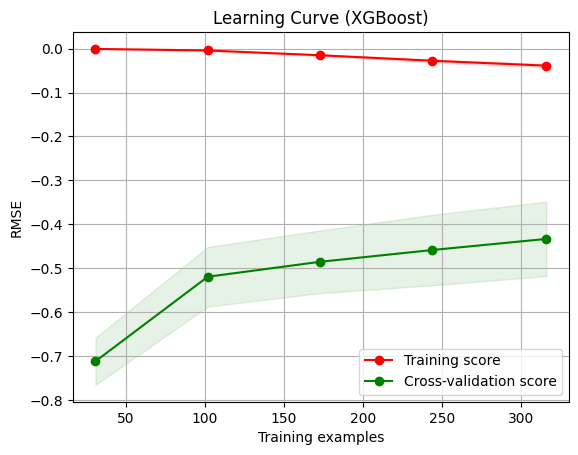

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Define a function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("RMSE")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_root_mean_squared_error')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve
plot_learning_curve(best_xgb_model, "Learning Curve (XGBoost)", X_train, y_train, cv=10, n_jobs=-1)
plt.show()


In [38]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error

SEED  = 42

def modelling(X, y, model, all_data=False, f_importance=False, fit=False):
    # Type of modelling : Train & Test basic splitting
    importance, tt_train_score, tt_test_score  = train_test_model(X, y, model, f_importance=f_importance)
    
    # Type of modelling : KFold Train & Test splitting
    kf_train_score, kf_test_score = kfold_model(X, y, model)
    
    if fit:
        model.fit(X, y)
        return model, tt_test_score, kf_test_score
    
    return importance, tt_test_score, kf_test_score

def train_test_model(X, y, model, f_importance=True):
    
    importance = None
    
    # Train & test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=SEED)
    
    # Fitting
    model.fit(X_train, y_train)
    
    # Scores
    train_pred = model.predict(X_train)
    test_pred  = model.predict(X_test)
    
    train_score = mean_squared_error(y_train, model.predict(X_train), squared=False)
    test_score = mean_squared_error(y_test, model.predict(X_test), squared=False)
    
    # Feature importances
    if f_importance:
        try:
            importance = model.feature_importances_
            features   = X.columns.tolist()
            importance = pd.Series(index=features, data=importance)
            return importance, train_score, test_score
        except:
            pass
        
    # Model, RMSE on train, RMSE on test
    return importance, train_score, test_score

def kfold_model(X, y, model):
    # Parameters & variables
    K            = 5
    kf           = KFold(K)
    train_scores = list() 
    test_scores  = list() 
    
    # Looping over the folds
    for train_index, test_index in kf.split(X):
        
        # Define datasets
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Fitting
        model.fit(X_train, y_train)
        
        # Scores
        train_pred = model.predict(X_train)
        test_pred  = model.predict(X_test)
        
        train_score = mean_squared_error(y_train, model.predict(X_train), squared=False)
        test_score = mean_squared_error(y_test, model.predict(X_test), squared=False)
        
        # Increments
        train_scores.append(train_score)
        test_scores.append(test_score)
    
    kf_train_score = np.mean(train_scores)
    kf_test_score  = np.mean(test_scores)
    
    return kf_train_score, kf_test_score

In [39]:
SPACE   = 26
display = lambda: print((SPACE * 3 + 7) * '-')

def multiple_modelling(X, y, models):
    display()
    print(f"|{'Model'.rjust(SPACE)} |{'Basic RMSE'.rjust(SPACE)} |{'K-Fold CV RMSE'.rjust(SPACE)} |")
    display()
        
    for model in models:
        _, basic_score, kfold_score = modelling(X, y, model, f_importance=False)
        print(f"|{type(model).__name__.rjust(SPACE)} |{str(round(basic_score, 5)).rjust(SPACE)} |{str(round(kfold_score, 5)).rjust(SPACE)} |")
        display()

In [40]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    DecisionTreeRegressor(),
    ExtraTreeRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor(),
    RandomForestRegressor(),
    XGBRegressor(),
    LGBMRegressor()
]

multiple_modelling(X_train, y_train, models)

-------------------------------------------------------------------------------------
|                     Model |                Basic RMSE |            K-Fold CV RMSE |
-------------------------------------------------------------------------------------
|          LinearRegression |                   0.49482 |                   0.49656 |
-------------------------------------------------------------------------------------
|                     Ridge |                   0.52876 |                   0.50121 |
-------------------------------------------------------------------------------------
|                     Lasso |                   0.58435 |                   0.56808 |
-------------------------------------------------------------------------------------
|     DecisionTreeRegressor |                   0.56454 |                   0.63847 |
-------------------------------------------------------------------------------------
|        ExtraTreeRegressor |                   0.5410

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


NameError: name 'correlation_matrix' is not defined

<Figure size 2000x1000 with 0 Axes>